# **The main objective of this analysis will be prediction**

## About the Dataset

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

Number of times pregnant.

Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
Diastolic blood pressure (mm Hg).

Triceps skinfold thickness (mm).

2-Hour serum insulin (mu U/ml).

Body mass index (weight in kg/(height in m)^2).

Diabetes pedigree function.

Age (years).

Class variable (0 or 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
df = pd.read_csv('diabetes.csv')

**EDA AND DATA CLEANING**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
#checking for null values in perfentages as in form of zeros
sr=df.isin([0]).mean()*100

In [ ]:
#converting 0 to null values and checking again
nc=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[nc]=df[nc].replace(0,np.NaN)
sr=df.isnull().mean()*100
sr

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [ ]:
#dropped the column whose null value percentage is more than 30%
sr[sr>30].index

Index(['Insulin'], dtype='object')

In [ ]:
data=df.copy()
data=data.drop(list(sr[sr>30].index),axis=1)

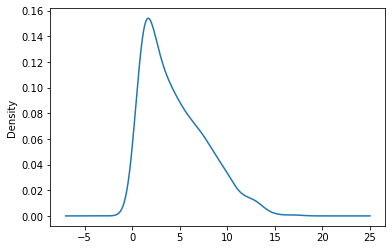

In [ ]:
#treating null values by replacing it with mean/median
data.Pregnancies.plot(kind='kde')


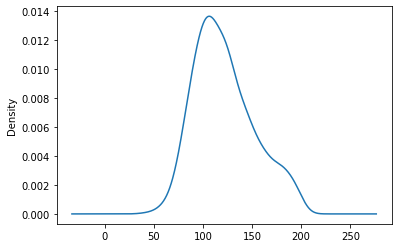

In [ ]:
data.Pregnancies=data.Pregnancies.fillna(data.Pregnancies.median())
data.Glucose.plot(kind='kde')

72.40518417462484

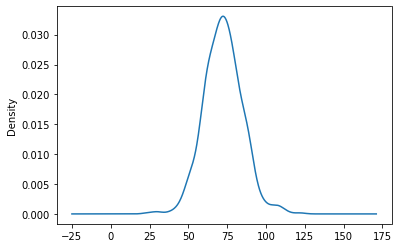

In [ ]:
data.BloodPressure.plot(kind='kde')
data.BloodPressure.mean()

29.153419593345657

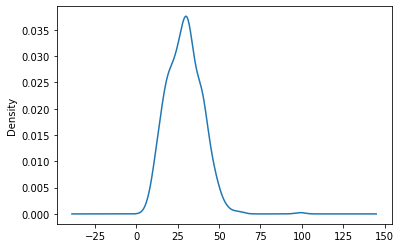

In [ ]:
data.SkinThickness.plot(kind='kde')
data.SkinThickness.mean()

32.457463672391015

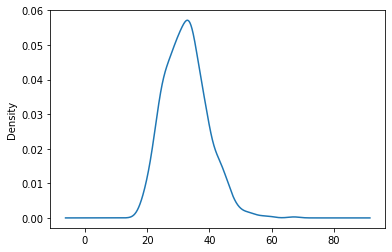

In [ ]:
data.BMI.plot(kind='kde')
data.BMI.mean()

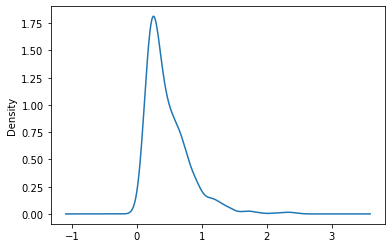

In [ ]:
data.DiabetesPedigreeFunction.plot(kind='kde')

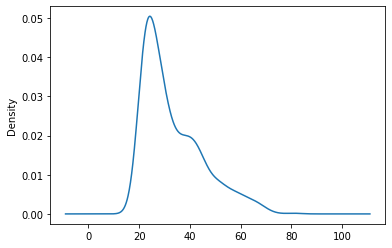

In [ ]:
data.Age.plot(kind='kde')

In [ ]:
data.Glucose=data.Glucose.fillna(data.Glucose.median())
data.BloodPressure=data.BloodPressure.fillna(data.BloodPressure.mean())
data.SkinThickness=data.SkinThickness.fillna(data.SkinThickness.median())
data.BMI=data.BMI.fillna(data.BMI.median())
data.DiabetesPedigreeFunction=data.DiabetesPedigreeFunction.fillna(data.DiabetesPedigreeFunction.median())
data.Age=data.Age.fillna(data.Age.median())

In [ ]:
#checking for null values again
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

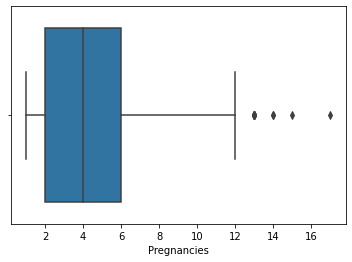

In [ ]:
#outlier checking and treatment by capping outliers
data_outlier_rem=data.copy()
sns.boxplot(x=data_outlier_rem['Pregnancies'])

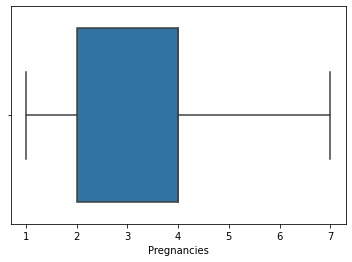

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Pregnancies'].values<8]
sns.boxplot(x=data_outlier_rem['Pregnancies'])

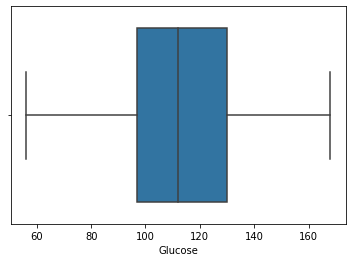

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Glucose'].values<169]
data_outlier_rem=data_outlier_rem[data_outlier_rem['Glucose'].values>50]
sns.boxplot(x=data_outlier_rem['Glucose'])

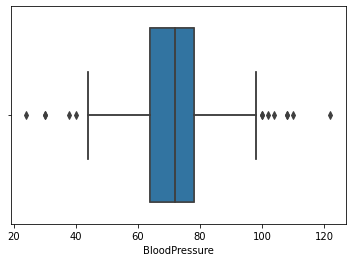

In [ ]:
sns.boxplot(x=data_outlier_rem['BloodPressure'])
data_outlier_rem=data_outlier_rem[data_outlier_rem['BloodPressure'].values>40]
data_outlier_rem=data_outlier_rem[data_outlier_rem['BloodPressure'].values<100]
sns.boxplot(x=data_outlier_rem['BloodPressure'])

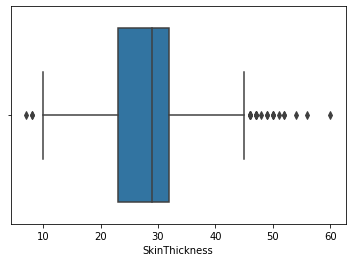

In [ ]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

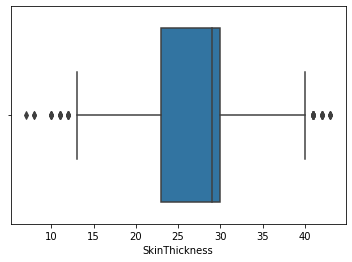

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['SkinThickness'].values<44]
sns.boxplot(x=data_outlier_rem['SkinThickness'])

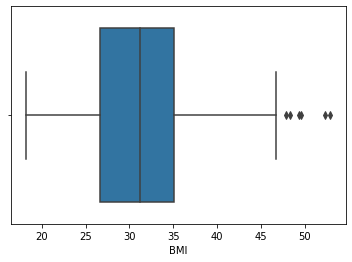

In [ ]:
sns.boxplot(x=data_outlier_rem['BMI'])

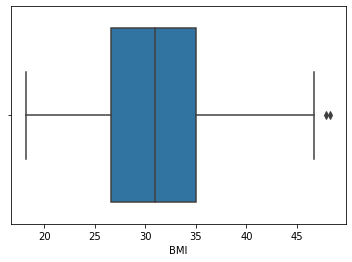

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['BMI'].values<49]
sns.boxplot(x=data_outlier_rem['BMI'])

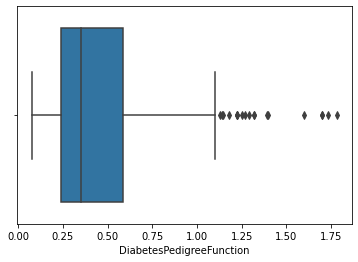

In [ ]:
sns.boxplot(x=data_outlier_rem['DiabetesPedigreeFunction'])

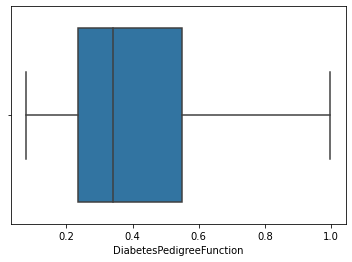

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['DiabetesPedigreeFunction'].values<1]
sns.boxplot(x=data_outlier_rem['DiabetesPedigreeFunction'])

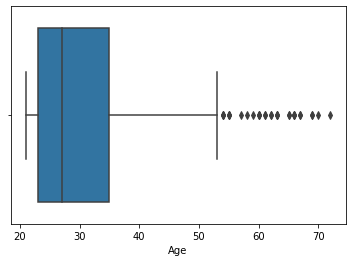

In [ ]:
sns.boxplot(x=data_outlier_rem['Age'])

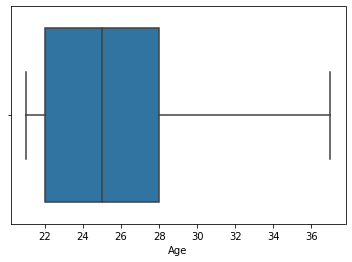

In [ ]:
data_outlier_rem=data_outlier_rem[data_outlier_rem['Age'].values<37.5]
sns.boxplot(x=data_outlier_rem['Age'])

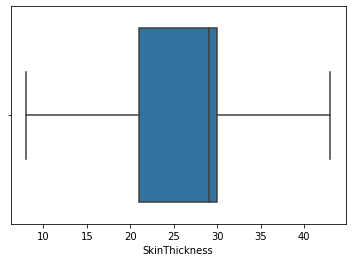

In [ ]:
sns.boxplot(x=data_outlier_rem['SkinThickness'])

In [ ]:
data_outlier_rem

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.0,66.0,29.0,26.6,0.351,31,0
3,1.0,89.0,66.0,23.0,28.1,0.167,21,0
5,5.0,116.0,74.0,29.0,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,31.0,0.248,26,1
10,4.0,110.0,92.0,29.0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...
758,1.0,106.0,76.0,29.0,37.5,0.197,26,0
760,2.0,88.0,58.0,26.0,28.4,0.766,22,0
764,2.0,122.0,70.0,27.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,26.2,0.245,30,0


In [ ]:
data_outlier_rem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 1 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               411 non-null    float64
 1   Glucose                   411 non-null    float64
 2   BloodPressure             411 non-null    float64
 3   SkinThickness             411 non-null    float64
 4   BMI                       411 non-null    float64
 5   DiabetesPedigreeFunction  411 non-null    float64
 6   Age                       411 non-null    int64  
 7   Outcome                   411 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 28.9 KB


In [ ]:
data_outlier_rem.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,411.0,3.097324,1.639532,1.000,2.0000,3.000,4.000,7.000
Glucose,411.0,111.428224,21.941087,56.000,95.0000,109.000,125.000,167.000
BloodPressure,411.0,69.046544,10.190262,44.000,62.0000,70.000,75.000,96.000
SkinThickness,411.0,26.671533,7.670446,8.000,21.0000,29.000,30.000,43.000
BMI,411.0,30.909246,6.287422,18.200,26.0000,30.800,35.000,48.300
DiabetesPedigreeFunction,411.0,0.399302,0.217756,0.078,0.2305,0.342,0.542,0.968
Age,411.0,25.936740,4.336559,21.000,22.0000,25.000,28.000,37.000
Outcome,411.0,0.187348,0.390666,0.000,0.0000,0.000,0.000,1.000


0    334
1     77
Name: Outcome, dtype: int64

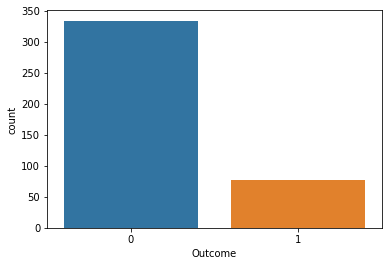

In [ ]:
#checking the output data is balanced or not
death=data_outlier_rem.copy()
sns.countplot(x=death['Outcome'])
death['Outcome'].value_counts()

In [ ]:
#as it is not balanced we balanced by resampling
from sklearn.utils import resample
dm=death[(death['Outcome']==0)]
dmin=death[(death['Outcome']==1)]
upsample=resample(dmin,replace=True,n_samples=334,random_state=42)
dd=pd.concat([upsample, dm])

In [ ]:
#checking for co-relation
dd.corr()["Outcome"].sort_values(ascending= False)

Outcome                     1.000000
Glucose                     0.458909
BMI                         0.358704
Age                         0.351587
SkinThickness               0.280357
Pregnancies                 0.250638
DiabetesPedigreeFunction    0.231490
BloodPressure               0.092890
Name: Outcome, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,5))
corr=df.corr()
sns.heatmap(corr,cmap="icefire", annot=True)

In [ ]:
dd

In [ ]:
x=dd.drop('Outcome',axis=1)
y=dd['Outcome']

  Priliminary explotary data analysis using the pandas library was used to get a sense on how the data looks like, it's count, it's data types and much more. short after that, null values was investigated and non were found but zeros were found and were replaced with NaN and were filled with mean or median depending on the distribution of the column. Boxplot from seaborn library was used to investigate outliers and eliminate. Graphical method was used for the entire data cleaning and after the cleaning was done, that dataset has shrunk from 768 to 411 rows. The target column was used to look data imbalance and the report show an extreme imbalace between diabetes Negative and Positive i.e 0 and 1 respectively. Resampling technique was used to handle it and the total dataset rose from 411 to 668 rows. No feature engineering technique was used.

**MODEL BUILDING**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
clf=LabelEncoder()

dd['Outcome']=clf.fit_transform(dd['Outcome'])

x_train, x_test, y_train, y_test= train_test_split(x, y, stratify=y, test_size=0.3)

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       100
           1       0.77      0.74      0.75       101

    accuracy                           0.76       201
   macro avg       0.76      0.76      0.76       201
weighted avg       0.76      0.76      0.76       201



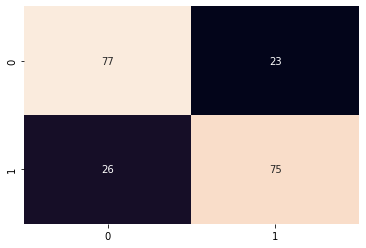

In [ ]:
from sklearn.metrics import confusion_matrix
p=log.predict(x_test)
m=confusion_matrix(y_test,p)
sns.heatmap(m, cbar= False, fmt='g', annot= True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
max_k = 40
f1_scores = list()
error_rates = list()

for k in range(1, max_k):

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(x_train, y_train)

    y_pred1 = knn.predict(x_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred1), 4)))
    error = 1-round(accuracy_score(y_test, y_pred1), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       100
           1       0.75      1.00      0.86       101

    accuracy                           0.84       201
   macro avg       0.88      0.83      0.83       201
weighted avg       0.88      0.84      0.83       201



Text(0.5, 1.0, 'KNN F1 Score')

<Figure size 1800x1200 with 0 Axes>

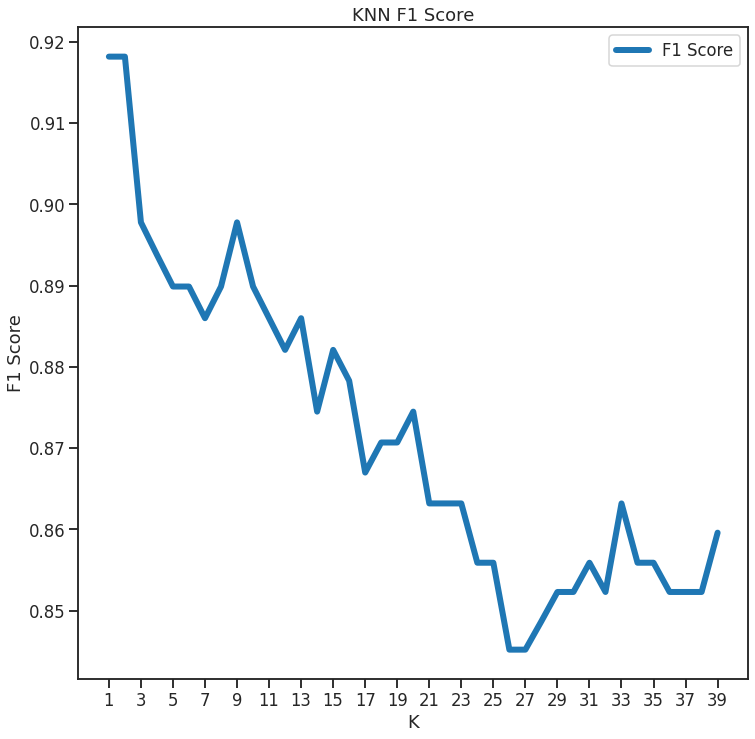

In [ ]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1800x1200 with 0 Axes>

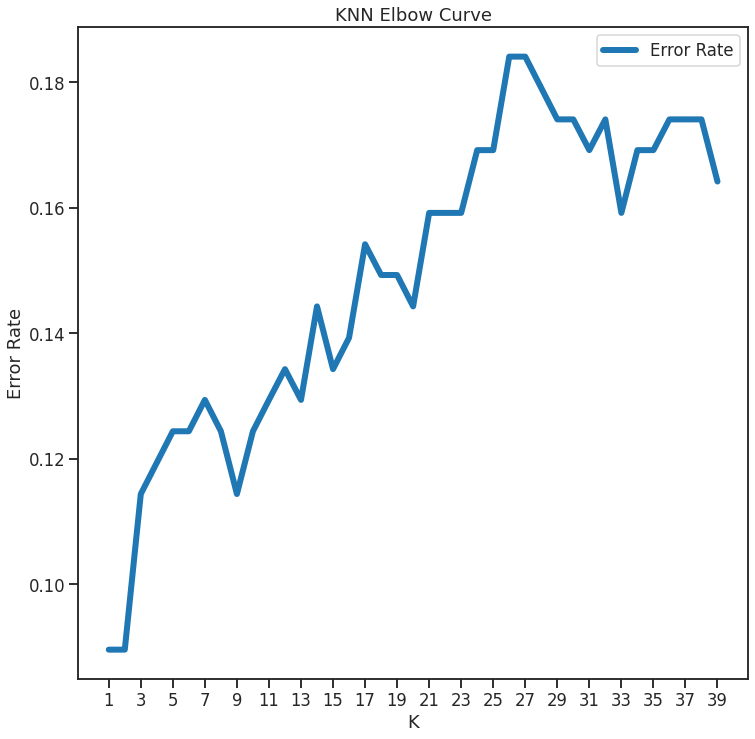

In [ ]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

tree_list = [15, 25, 50, 100, 200, 300, 400]

param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42),
                      param_grid=param_grid,
                      scoring='accuracy',
                      n_jobs=-1)

GV_GBC = GV_GBC.fit(x_train, y_train)

In [ ]:
GV_GBC.best_estimator_

In [ ]:
y_pred2 = GV_GBC.predict(x_test)
print(classification_report(y_pred2, y_test))

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred2)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(oob_score=True,
                            random_state=42,
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:

    RF.set_params(n_estimators=n_trees)

    RF.fit(x_train, y_train)

    oob_error = 1 - RF.oob_score_

    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.113490
20.0,0.100642
30.0,0.102784
40.0,0.092077
50.0,0.096360
100.0,0.079229
150.0,0.087794
200.0,0.083512
300.0,0.081370


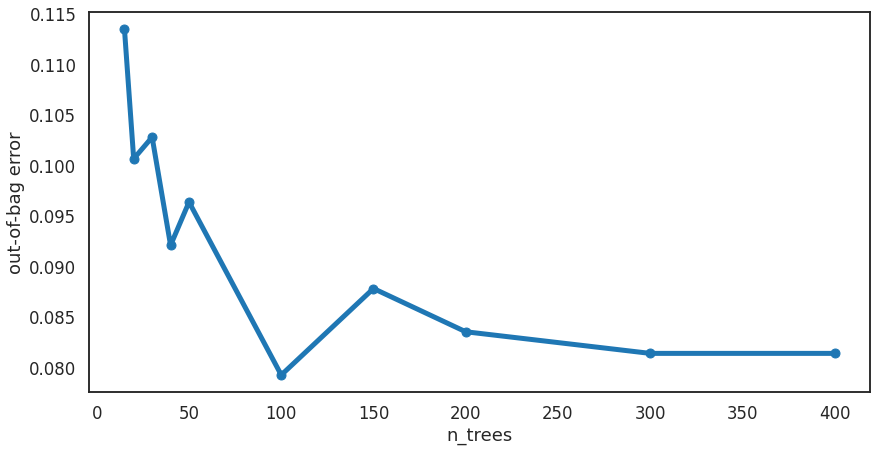

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rff = RandomForestClassifier(n_estimators = 150, n_jobs = 1, random_state =42, warm_start=True)
rff.fit(x_train, y_train)
y_pred3 = rff.predict(x_test)

print(classification_report(y_pred3, y_test))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        85
           1       1.00      0.87      0.93       116

    accuracy                           0.93       201
   macro avg       0.93      0.94      0.92       201
weighted avg       0.94      0.93      0.93       201



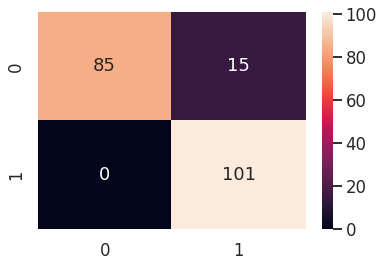

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred3)
ax = sns.heatmap(cm, annot=True, fmt='d')

Four classification models were build for this project with the same Train Test Split. The first model was Logistic regression with the max iteration of 10,000 and had an accuracy of 81 percent. The second model was K-Nearest Neighbour. A for loop was used to find the optimal/best value for K with a range of 1 to 40 and 1 was found to be the best value for K as the graph showed for f1_score and error rate. It had an overall accuracy of 85 percent. The next model was a tree based ensamble model called Gradient Boosting. It uses boosting technique of ensambling to predict outcomes. For this project, Grid Search CV was used to find the best hyperparameters for the model and were as max features of 3, 400 trees and subsample of 0.5. It had and overall accuracy of 94 percent. The final model was also a tree based ensamble model called Random Forest that uses bagging ensamble technique. A for loop was also used in this scenario to find the optimum number of trees sufficient for the classification problem. It had an accuracy of 93 percent. Grandient boosting had the overall best accuracy while logistic regression had the worst. I would recommend Random forest not because it had the best accuracy but it is more explainable than the boosting algorithm. It also had the second best accuracy with on a 0.01 interval with gradient boosting model.

Key insights from this project shows the importance of data cleaning and handling of imbalance data. Without the resampling, the models would have overfitted greatly.

Steps to further the project may include scaling of the data as KNN and Logistic regression are sensitive to data scaling, feature engineering and more data.